# Load and display housing.csv

Loads and displays the data.

Dataset shape: (506, 14)

Basic statistics:
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.45553

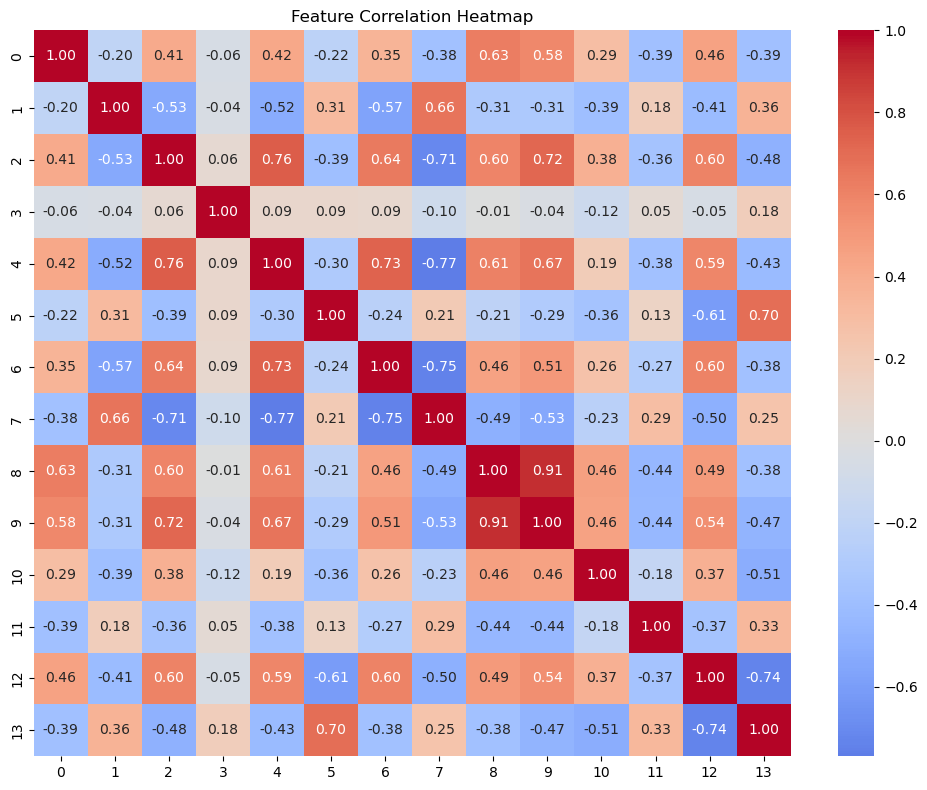

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../housing.csv", delim_whitespace=True, header=None)

# Data Analysis
print(f"Dataset shape: {df.shape}")
print(f"\nBasic statistics:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nTarget (last column) - Mean: {df.iloc[:, -1].mean():.2f}, Std: {df.iloc[:, -1].std():.2f}")

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('images/linear_regression_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

X = df.iloc[:, :-1].to_numpy(dtype=float)
y = df.iloc[:, -1].to_numpy(dtype=float)
#normalization
m, n = X.shape  
mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=0)
#checking if std deviation is equal to 0, if it is make it 1
sigma[sigma == 0] = 1.0  
X = (X - mu) / sigma

In [2]:
# Partition into train/val/test (80/10/10)
rng = np.random.default_rng(42)
perm = rng.permutation(m)

m_train = int(0.80 * m)
m_val = int(0.10 * m)
m_test = m - m_train - m_val

idx_train = perm[:m_train]
idx_val = perm[m_train:m_train+m_val]
idx_test = perm[m_train+m_val:]

X_train, y_train = X[idx_train], y[idx_train]
X_val, y_val = X[idx_val], y[idx_val]
X_test, y_test = X[idx_test], y[idx_test]

print(f"Train: {m_train}, Val: {m_val}, Test: {m_test}")


Train: 404, Val: 50, Test: 52


In [3]:
w = np.zeros(n, dtype=float)
b = 0.0

def f(X, w, b):
    return X @ w + b

def step(X, y, w, b, alpha):
    m = len(y)
    e = f(X, w, b) - y
    grad_w = (X.T @ e) / m
    grad_b = e.mean()
    return w - alpha * grad_w, b - alpha * grad_b

def cost(X, y, w, b):
    e = f(X, w, b) - y
    return 0.5 * np.mean(e ** 2)

alpha = 0.05      
max_epochs = 420 
tol = 1e-8        
prev_J = None
cost_history = []

for epoch in range(1, max_epochs + 1):
    w, b = step(X, y, w, b, alpha)
    J = cost(X, y, w, b)
    cost_history.append(J)
    if prev_J is not None and abs(prev_J - J) < tol:
        break  
    prev_J = J

y_pred = f(X, w, b)
mse = np.mean((y - y_pred) ** 2)

print(f"Final MSE: {mse:.2f}")


Final MSE: 21.95


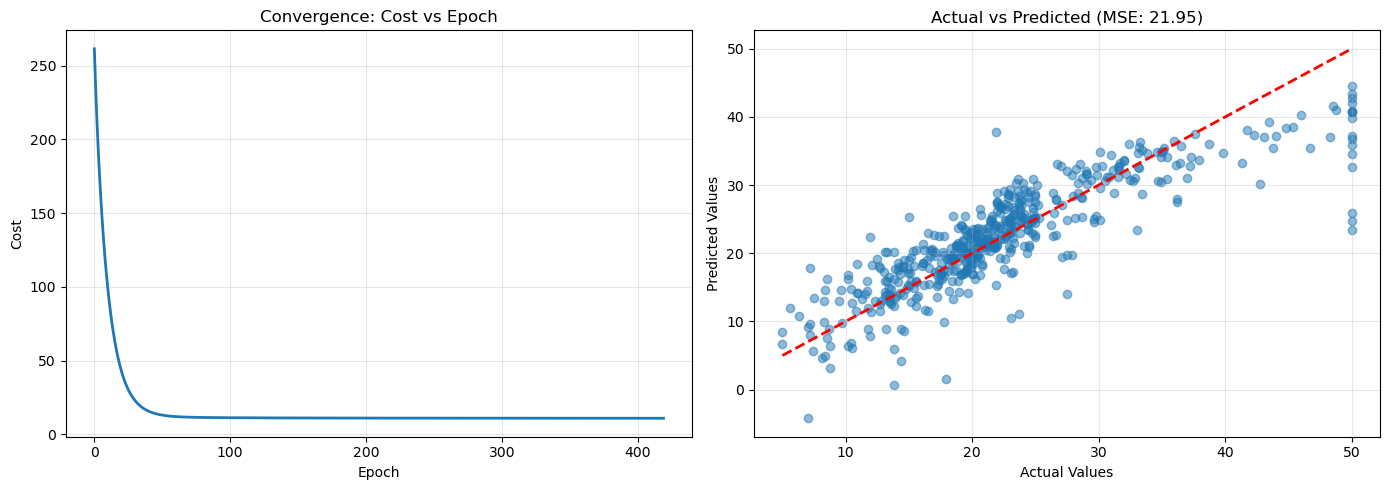

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Convergence
axes[0].plot(cost_history, linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cost')
axes[0].set_title('Convergence: Cost vs Epoch')
axes[0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1].scatter(y, y_pred, alpha=0.5)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Actual vs Predicted (MSE: {mse:.2f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/linear_regression_results.png', dpi=150, bbox_inches='tight')
plt.show()
